### Time Series Forecasting using LSTM

In [1]:
# Importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import os
from convert_columns_to_floats import *

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False



In [2]:
orig_df = pd.read_csv('/Users/faymajidelhassan/Downloads/Master project /Data/Weather/forecasts/open_meteo.csv') 
df = orig_df.copy() 
print(f'Size of the dataset: {df.shape} \n')  
print() 
display(df.head(5))

Size of the dataset: (5292, 16) 




,timestamp,temperature,humidity,pressure_msl,pressure_surface,global_irradiance,direct_irradiance,diffuse_irradiance,cloud_cover,wind_speed,wind_direction,precipitation,rain,showers,snowfall,weather_code
0,2022-07-11 12:00:00,"[22.0, 22.6, 23.1, 23.4, 23.2, 22.7, 21.6, 20....","[42.0, 42.0, 41.0, 39.0, 40.0, 41.0, 49.0, 58....","[1021.5, 1021.0, 1020.6, 1020.2, 1019.7, 1019....","[1007.9, 1007.4, 1007.1, 1006.7, 1006.2, 1006....","[599.0, 645.0, 546.0, 507.0, 393.0, 245.0, 88....","[271.9, 390.3, 333.4, 422.8, 450.5, 389.1, 127...","[352.0, 307.0, 285.0, 226.0, 159.0, 106.0, 64....","[67.0, 80.0, 68.0, 54.0, 57.0, 90.0, 100.0, 10...","[6.2, 6.0, 5.8, 6.2, 6.6, 6.6, 3.2, 1.5, 4.0, ...","[173.0, 147.0, 150.0, 159.0, 158.0, 167.0, 153...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, ..."
1,2022-07-11 13:00:00,"[22.6, 23.1, 23.4, 23.2, 22.7, 21.6, 20.3, 18....","[42.0, 41.0, 39.0, 40.0, 41.0, 49.0, 58.0, 64....","[1021.0, 1020.6, 1020.2, 1019.7, 1019.8, 1020....","[1007.4, 1007.1, 1006.7, 1006.2, 1006.2, 1006....","[645.0, 546.0, 507.0, 393.0, 245.0, 88.0, 10.0...","[390.3, 333.4, 422.8, 450.5, 389.1, 127.0, 0.0...","[307.0, 285.0, 226.0, 159.0, 106.0, 64.0, 10.0...","[80.0, 68.0, 54.0, 57.0, 90.0, 100.0, 100.0, 1...","[6.0, 5.8, 6.2, 6.6, 6.6, 3.2, 1.5, 4.0, 2.9, ...","[147.0, 150.0, 159.0, 158.0, 167.0, 153.0, 104...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
2,2022-07-11 14:00:00,"[23.2, 23.6, 23.5, 23.0, 22.1, 20.4, 18.9, 18....","[38.0, 38.0, 38.0, 39.0, 46.0, 54.0, 63.0, 62....","[1020.6, 1020.3, 1019.6, 1019.6, 1020.0, 1020....","[1007.1, 1006.8, 1006.1, 1006.1, 1006.4, 1006....","[417.0, 442.0, 417.0, 267.0, 96.0, 11.0, 0.0, ...","[149.5, 287.4, 525.5, 481.5, 158.8, 0.0, 0.0, ...","[300.0, 251.0, 144.0, 95.0, 66.0, 11.0, 0.0, 0...","[86.0, 62.0, 24.0, 88.0, 100.0, 100.0, 100.0, ...","[4.0, 5.6, 6.8, 5.3, 4.5, 2.5, 2.9, 3.7, 1.3, ...","[170.0, 165.0, 155.0, 152.0, 166.0, 90.0, 7.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.0, 2.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
3,2022-07-11 15:00:00,"[23.6, 23.5, 23.0, 22.1, 20.4, 18.9, 18.2, 18....","[38.0, 38.0, 39.0, 46.0, 54.0, 63.0, 62.0, 65....","[1020.3, 1019.6, 1019.6, 1020.0, 1020.5, 1021....","[1006.8, 1006.1, 1006.1, 1006.4, 1006.8, 1007....","[442.0, 417.0, 267.0, 96.0, 11.0, 0.0, 0.0, 0....","[287.4, 525.5, 481.5, 158.8, 0.0, 0.0, 0.0, 0....","[251.0, 144.0, 95.0, 66.0, 11.0, 0.0, 0.0, 0.0...","[62.0, 24.0, 88.0, 100.0, 100.0, 100.0, 92.0, ...","[5.6, 6.8, 5.3, 4.5, 2.5, 2.9, 3.7, 1.3, 2.1, ...","[165.0, 155.0, 152.0, 166.0, 90.0, 7.0, 11.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, ..."
4,2022-07-11 16:00:00,"[23.5, 23.0, 22.1, 20.4, 18.9, 18.2, 18.0, 17....","[38.0, 39.0, 46.0, 54.0, 63.0, 62.0, 65.0, 65....","[1019.6, 1019.6, 1020.0, 1020.5, 1021.1, 1021....","[1006.1, 1006.1, 1006.4, 1006.8, 1007.4, 1007....","[417.0, 267.0, 96.0, 11.0, 0.0, 0.0, 0.0, 0.0,...","[525.5, 481.5, 158.8, 0.0, 0.0, 0.0, 0.0, 0.0,...","[144.0, 95.0, 66.0, 11.0, 0.0, 0.0, 0.0, 0.0, ...","[24.0, 88.0, 100.0, 100.0, 100.0, 92.0, 90.0, ...","[6.8, 5.3, 4.5, 2.5, 2.9, 3.7, 1.3, 2.1, 3.1, ...","[155.0, 152.0, 166.0, 90.0, 7.0, 11.0, 146.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [3]:
# Convert specific columns to lists of floats
# columns_to_convert1 = [
#     'temperature', 'humidity', 'pressure',	'cloud_cover',	'wind_speed',
#         	'wind_direction',	'weather_code'	,'poprecipitation'
# ]

columns_to_convert2 = [
    'temperature', 'humidity', 'pressure_msl', 'pressure_surface', 
    'global_irradiance', 'direct_irradiance', 'diffuse_irradiance',
    'cloud_cover', 'wind_speed', 'wind_direction', 'precipitation',
    'rain', 'showers', 'snowfall', 'weather_code'
]
def convert_columns_to_floats2(df, columns_to_convert):
    for col in columns_to_convert:
        print(f"Processing column: {col}")
        df[col] = df[col].astype(str).apply(parse_complex_string)
        print(f"Processed column: {col}")
    return df

def flatten_columns(df, columns_to_flatten):
    for col in columns_to_flatten:
        df[col] = df[col].apply(lambda x: np.mean(x) if isinstance(x, list) else x)
    return df
def reduce_cells_for_all_columns(df, columns_to_reduce,n=int):
    '''
    Reduce each cell in each column by 96 values from the end
    '''
    for cols in columns_to_reduce:
        df[cols] = df[cols].apply(lambda x: x[:-n])
    return df
# df = convert_columns_to_floats2(df, columns_to_convert1)
df= convert_columns_to_floats2(df, columns_to_convert2)
# Flatten the columns
df= reduce_cells_for_all_columns(df,columns_to_convert2,n=96)
# df = flatten_columns(df, columns_to_convert1)
df = flatten_columns(df, columns_to_convert2)

Processing column: temperature
Processed column: temperature
Processing column: humidity
Processed column: humidity
Processing column: pressure_msl
Processed column: pressure_msl
Processing column: pressure_surface
Processed column: pressure_surface
Processing column: global_irradiance
Processed column: global_irradiance
Processing column: direct_irradiance
Processed column: direct_irradiance
Processing column: diffuse_irradiance
Processed column: diffuse_irradiance
Processing column: cloud_cover
Processed column: cloud_cover
Processing column: wind_speed
Processed column: wind_speed
Processing column: wind_direction
Processed column: wind_direction
Processing column: precipitation
Processed column: precipitation
Processing column: rain
Processed column: rain
Processing column: showers
Processed column: showers
Processing column: snowfall
Processed column: snowfall
Processing column: weather_code
Processed column: weather_code


In [4]:
df.head()

,timestamp,temperature,humidity,pressure_msl,pressure_surface,global_irradiance,direct_irradiance,diffuse_irradiance,cloud_cover,wind_speed,wind_direction,precipitation,rain,showers,snowfall,weather_code
0,2022-07-11 12:00:00,21.331667,53.716667,1021.806667,1008.158333,277.250000,269.405000,104.033333,50.700000,4.998333,202.816667,0.001667,0.001667,0.0,0.0,2.900000
1,2022-07-11 13:00:00,21.320339,53.915254,1021.811864,1008.162712,271.796610,269.362712,99.830508,50.423729,4.977966,203.322034,0.001695,0.001695,0.0,0.0,2.915254
2,2022-07-11 14:00:00,21.570690,52.137931,1021.886207,1008.243103,264.603448,258.694828,98.551724,47.517241,5.106897,193.741379,0.000000,0.000000,0.0,0.0,1.534483
3,2022-07-11 15:00:00,21.542105,52.385965,1021.908772,1008.263158,261.929825,260.610526,95.017544,46.842105,5.126316,194.157895,0.000000,0.000000,0.0,0.0,1.508772
4,2022-07-11 16:00:00,21.582143,52.589286,1022.000000,1008.362500,259.214286,261.898214,91.392857,46.392857,5.014286,192.410714,0.000000,0.000000,0.0,0.0,1.500000


<Axes: xlabel='timestamp'>

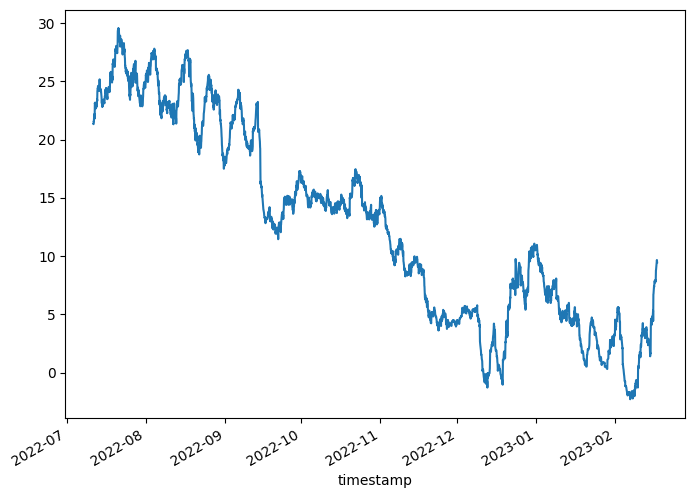

In [5]:
# Convert timestamp to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Fill missing values using forward fill
df = df.fillna(method='ffill')

# Plot univariate data (temperature)
uni_data = df['temperature']
uni_data.plot()

# Resample and aggregate the data
# df = df.resample('H').agg({
#     'temperature': 'mean',  
#     'humidity': 'mean',     
#     'pressure_msl': 'mean',  
#     'pressure_surface': 'mean',
#     'global_irradiance': 'sum',  
#     'direct_irradiance': '',
#     'diffuse_irradiance': 'sum',
#     'cloud_cover': 'mean',
#     'wind_speed': 'mean',
#     'wind_direction': 'mean',
#     'precipitation': 'sum',
#     'rain': 'sum',
#     'showers': 'sum',
#     'snowfall': 'sum',
#     'weather_code': 'mean'
# })


In [6]:
df.describe()

,temperature,humidity,pressure_msl,pressure_surface,global_irradiance,direct_irradiance,diffuse_irradiance,cloud_cover,wind_speed,wind_direction,precipitation,rain,showers,snowfall,weather_code
count,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000
mean,12.591215,75.630217,1018.957020,1004.925424,113.693145,121.564247,50.134597,69.377855,5.671113,160.068182,0.115860,0.104533,0.008689,0.001578,14.913026
std,8.484111,13.859631,7.997124,7.764036,81.485599,93.313219,24.078698,23.398859,2.287777,50.140470,0.208524,0.198123,0.022222,0.009265,12.675588
min,-2.289796,36.876923,992.111321,978.075472,10.122807,0.070690,10.105263,0.000000,2.061667,33.017241,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.892147,66.749595,1013.831370,1000.257894,47.052679,45.918841,29.360000,55.542510,4.174784,128.010870,0.000000,0.000000,0.000000,0.000000,4.303436
50%,12.873041,79.049598,1019.507206,1005.450960,89.523571,100.670455,44.375792,73.858571,5.140877,162.572339,0.012933,0.004225,0.000000,0.000000,11.698413
75%,20.748274,86.758780,1023.057278,1008.973500,170.505391,180.897398,68.826042,88.223824,6.616425,193.955855,0.152858,0.134094,0.007547,0.000000,22.934623
max,29.543284,97.530612,1041.235714,1026.157143,353.876923,430.704545,117.225806,100.000000,18.456250,279.137255,2.228333,2.188333,0.289855,0.143889,60.933333


Observations:
1) One reading evrry 10 mins (from datatime column time diff for every record )
2) 1day = 6*24 = 144 readings
Task : Forecasting Temperature(in degree ) in future 




In [7]:
# uni_data = uni_data.values



In [8]:
uni_data.shape

(5292,)

In [9]:
uni_data = np.array(uni_data)

In [10]:
## train test split for simple time series moving window average
train_split = int(len(uni_data) * 0.8)#4234
tf.random.set_seed(13)

# ### standardize data
# uni_data_mean = uni_data[:train_split].mean()
# uni_data_std = uni_data[:train_split].std()
# uni_data  = (uni_data - uni_data_mean)/ uni_data_std

print(type(uni_data))


<class 'pandas.core.series.Series'>


Moving Window Average


1.   Given last 20 values of observations(temp) , predict next observation
2.   MWA: predict== AVG(last 20 values)




In [11]:
## utility functions

## funtion to create data for univariate forecasting

def univariate_data(dataset, start_idx , end_idx , history_size, target_size):
  data = []
  labels = []
  start_idx  = start_idx + history_size
  if end_idx is None:
    end_idx = len(dataset)- target_size
  for i in range(start_idx , end_idx):
    idxs = range(i-history_size , i)
    data.append(np.reshape(dataset[idxs] , (history_size, 1))) ### reshape data
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

uni_data_history = 50   ## last 50 values
uni_data_future = 0     ## future data

x_train_uni , y_train_uni = univariate_data(uni_data , 0 , train_split , uni_data_history , uni_data_future)

x_val_uni , y_val_uni = univariate_data(uni_data , train_split , None ,uni_data_history , uni_data_future)

In [12]:
x_train_uni

array([[[21.33166667],
        [21.32033898],
        [21.57068966],
        ...,
        [24.32459016],
        [24.26833333],
        [24.2       ]],

       [[21.32033898],
        [21.57068966],
        [21.54210526],
        ...,
        [24.26833333],
        [24.2       ],
        [24.42931034]],

       [[21.57068966],
        [21.54210526],
        [21.58214286],
        ...,
        [24.2       ],
        [24.42931034],
        [24.33508772]],

       ...,

       [[ 9.22857143],
        [ 9.25797101],
        [ 9.20588235],
        ...,
        [ 7.7971831 ],
        [ 7.76714286],
        [ 7.75072464]],

       [[ 9.25797101],
        [ 9.20588235],
        [ 9.32537313],
        ...,
        [ 7.76714286],
        [ 7.75072464],
        [ 7.64558824]],

       [[ 9.20588235],
        [ 9.32537313],
        [ 9.36818182],
        ...,
        [ 7.75072464],
        [ 7.64558824],
        [ 7.37761194]]])

In [13]:
print(x_train_uni.shape , y_train_uni.shape)
print(x_val_uni.shape , y_val_uni.shape)

(4183, 50, 1) (4183,)
(1009, 50, 1) (1009,)


In [14]:
print('Single window of history data' , x_train_uni[0])

print('Target Temperature to predict ' , y_train_uni[0])


Single window of history data [[21.33166667]
 [21.32033898]
 [21.57068966]
 [21.54210526]
 [21.58214286]
 [21.81090909]
 [21.78703704]
 [21.77735849]
 [22.1       ]
 [22.15294118]
 [22.204     ]
 [21.8       ]
 [23.06388889]
 [23.13802817]
 [23.06285714]
 [23.15507246]
 [23.16911765]
 [22.68059701]
 [22.77121212]
 [22.82769231]
 [22.7671875 ]
 [22.77777778]
 [22.66612903]
 [22.84918033]
 [22.80666667]
 [22.75084746]
 [22.9637931 ]
 [22.91754386]
 [23.025     ]
 [22.82545455]
 [22.82037037]
 [22.85471698]
 [23.12307692]
 [23.20588235]
 [23.452     ]
 [23.30408163]
 [24.04166667]
 [24.17323944]
 [24.21571429]
 [24.35652174]
 [24.35      ]
 [24.42537313]
 [24.54242424]
 [24.60153846]
 [24.41875   ]
 [24.41904762]
 [24.36451613]
 [24.32459016]
 [24.26833333]
 [24.2       ]]
Target Temperature to predict  24.429310344827588


<module 'matplotlib.pyplot' from '/Users/faymajidelhassan/anaconda3/envs/m/lib/python3.10/site-packages/matplotlib/pyplot.py'>

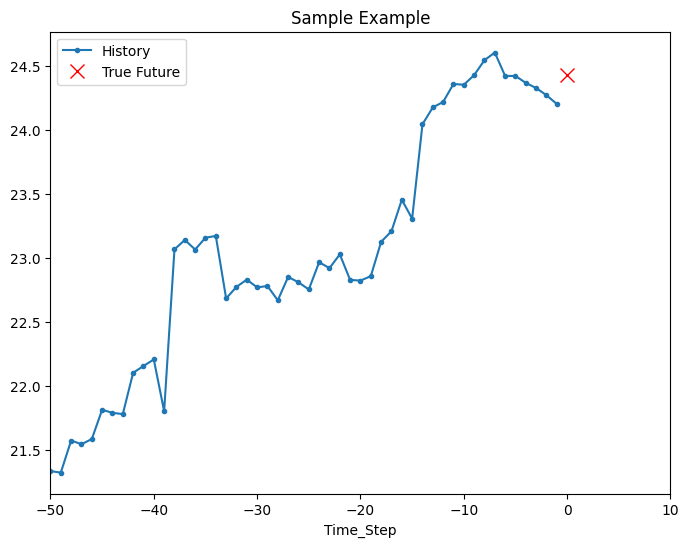

In [15]:
### fucntion to create time steps
def create_time_steps(length):
  return list(range(-length,0))

### function to plot time series data

def plot_time_series(plot_data, delta , title):
  labels = ["History" , 'True Future' , 'Model Predcited']
  marker = ['.-' , 'rx' , 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])

  if delta:
    future = delta
  else:
    future = 0
  plt.title(title)
  for i , x in enumerate(plot_data):
    if i :
      plt.plot(future , plot_data[i] , marker[i], markersize = 10 , label = labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5) *2])

  plt.xlabel('Time_Step')
  return plt
## function to plot time series data



plot_time_series([x_train_uni[0] , y_train_uni[0]] , 0 , 'Sample Example')

<module 'matplotlib.pyplot' from '/Users/faymajidelhassan/anaconda3/envs/m/lib/python3.10/site-packages/matplotlib/pyplot.py'>

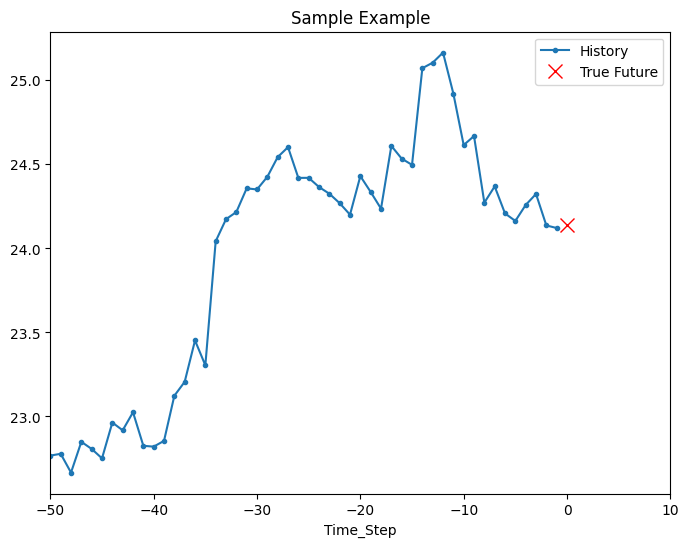

In [16]:
i = 20
plot_time_series([x_train_uni[i], y_train_uni[i]] , 0 , 'Sample Example')

In [17]:
### Moving window average

def MWA(history):
  return np.mean(history)




<module 'matplotlib.pyplot' from '/Users/faymajidelhassan/anaconda3/envs/m/lib/python3.10/site-packages/matplotlib/pyplot.py'>

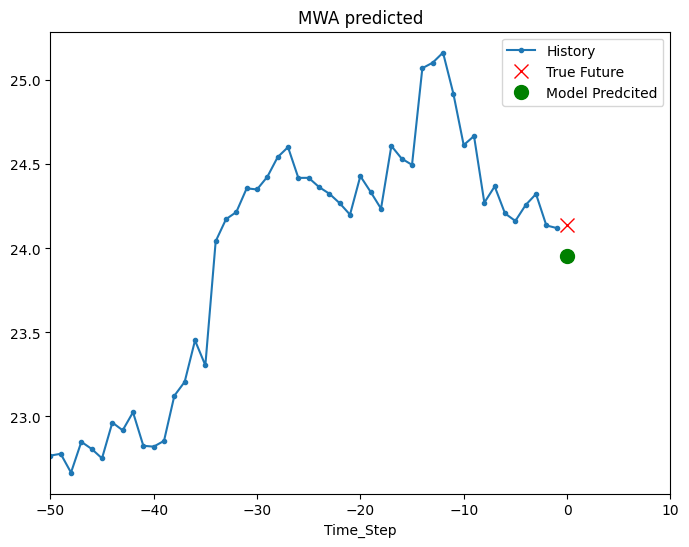

In [18]:
i = 20
plot_time_series([x_train_uni[i] , y_train_uni[i] , MWA(x_train_uni[i])] , 0 , 'MWA predicted')

Univariate time-series forecasting


*   Only single feature as temperature(historical data)
*   Task:  Given last 20 observations(history) , predict next temperature value 



In [19]:
## prepare tensorflow dataset
batch_size = 64
buffer_size = 1000

train_uni = tf.data.Dataset.from_tensor_slices((x_train_uni , y_train_uni))
train_uni = train_uni.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_uni = tf.data.Dataset.from_tensor_slices((x_val_uni , y_val_uni))
val_uni = val_uni.cache().shuffle(buffer_size).batch(batch_size).repeat()

print(train_uni)
print(val_uni)

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 50, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 50, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [63]:
## Define LSTM model 

lstm_model = tf.keras.models.Sequential([tf.keras.layers.LSTM(16 , input_shape = x_train_uni.shape[-2:]), 
                                         tf.keras.layers.Dense(1)])

lstm_model.compile(optimizer = 'adam', loss = 'mae')

steps = 200

EPOCHS =50

lstm_model.fit(train_uni , epochs = EPOCHS, steps_per_epoch = steps ,
               validation_data = val_uni, validation_steps = 50)




Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 15.2381 - val_loss: 0.3667
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.4267 - val_loss: 0.2221
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.0068 - val_loss: 0.2544
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.8554 - val_loss: 0.1852
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6803 - val_loss: 0.1674
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7438 - val_loss: 0.2696
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1253 - val_loss: 0.1528
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6585 - val_loss: 0.1577
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4112 - val_loss: 0.1965
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2998 - val_loss: 0.1979
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2350 - val_loss: 0.1452
Epoch 12/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/ste

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


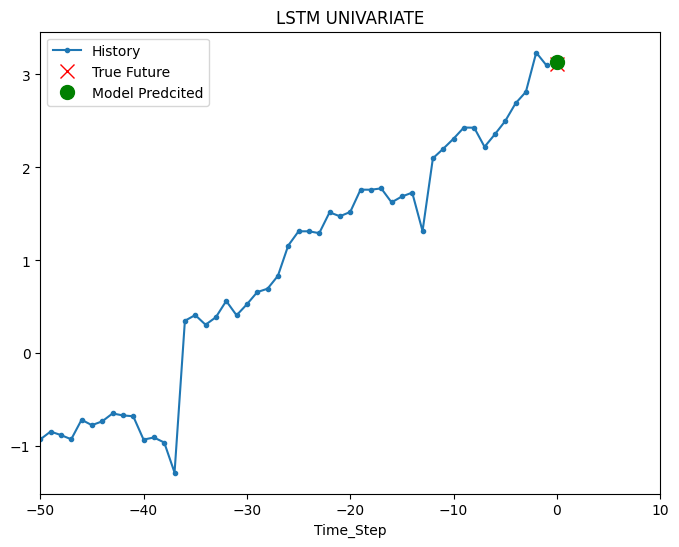

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


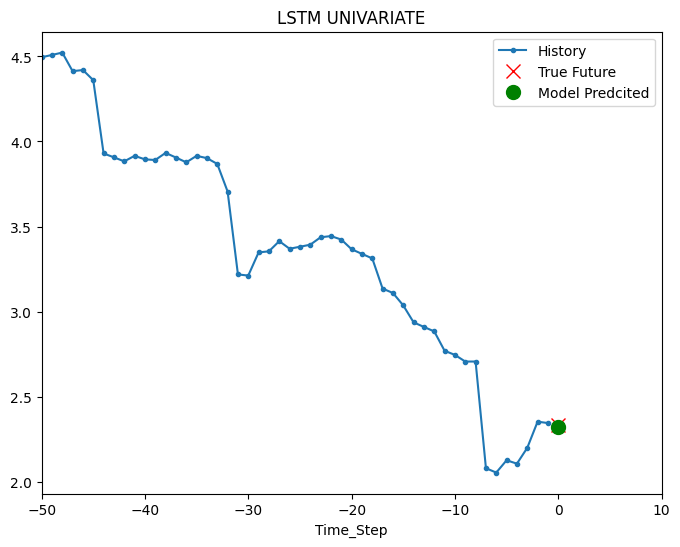

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


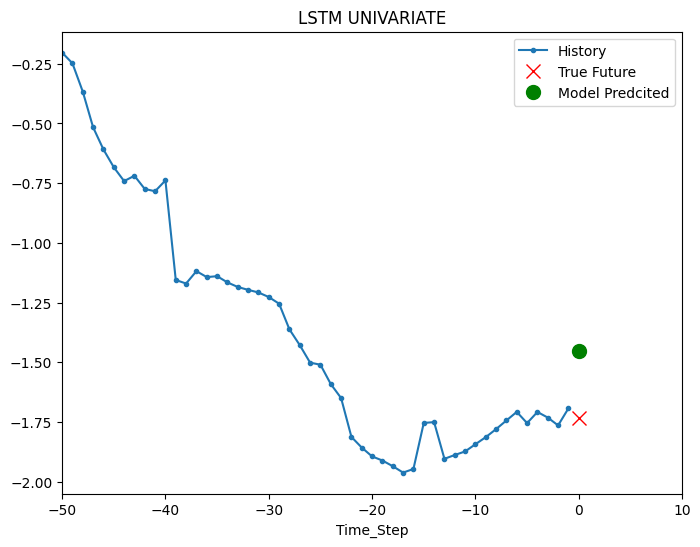

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


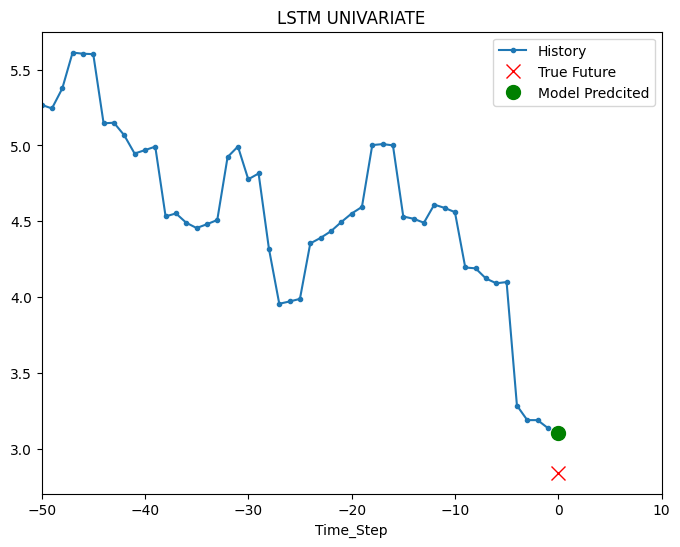

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


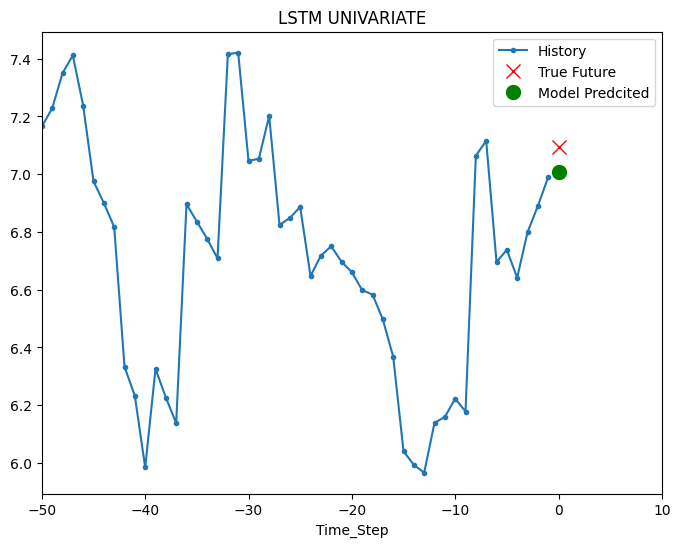

2024-05-27 11:38:48.354660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
for i , j in val_uni.take(5):
  plot = plot_time_series([i[0].numpy() , j[0].numpy() , lstm_model.predict(i)[0]] ,0 , 'LSTM UNIVARIATE')
  plot.show()

Multivariate  and Single step Forecasting


*   Task: Given 3 features(temp , pressure , and density) at each time step can we predict the temp in future at single time step




In [65]:
## features 

# features_6 = ['temperature', 'humidity', 'pressure', 'global_irradiance', 'direct_irradiance', 'diffuse_irradiance']
features14 = [
    'temperature', 'humidity', 'pressure_msl', 'pressure_surface', 
    'global_irradiance', 'direct_irradiance', 'diffuse_irradiance',
    'cloud_cover', 'wind_speed', 'wind_direction', 'precipitation',
    'rain', 'showers', 'snowfall'
]
features = df[features14]
features.head()



,temperature,humidity,pressure_msl,pressure_surface,global_irradiance,direct_irradiance,diffuse_irradiance,cloud_cover,wind_speed,wind_direction,precipitation,rain,showers,snowfall
timestamp,,,,,,,,,,,,,,
2022-07-11 12:00:00,21.331667,53.716667,1021.806667,1008.158333,277.250000,269.405000,104.033333,50.700000,4.998333,202.816667,0.001667,0.001667,0.0,0.0
2022-07-11 13:00:00,21.320339,53.915254,1021.811864,1008.162712,271.796610,269.362712,99.830508,50.423729,4.977966,203.322034,0.001695,0.001695,0.0,0.0
2022-07-11 14:00:00,21.570690,52.137931,1021.886207,1008.243103,264.603448,258.694828,98.551724,47.517241,5.106897,193.741379,0.000000,0.000000,0.0,0.0
2022-07-11 15:00:00,21.542105,52.385965,1021.908772,1008.263158,261.929825,260.610526,95.017544,46.842105,5.126316,194.157895,0.000000,0.000000,0.0,0.0
2022-07-11 16:00:00,21.582143,52.589286,1022.000000,1008.362500,259.214286,261.898214,91.392857,46.392857,5.014286,192.410714,0.000000,0.000000,0.0,0.0


In [66]:
features.isnull().sum()

temperature           0
humidity              0
pressure_msl          0
pressure_surface      0
global_irradiance     0
direct_irradiance     0
diffuse_irradiance    0
cloud_cover           0
wind_speed            0
wind_direction        0
precipitation         0
rain                  0
showers               0
snowfall              0
dtype: int64

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

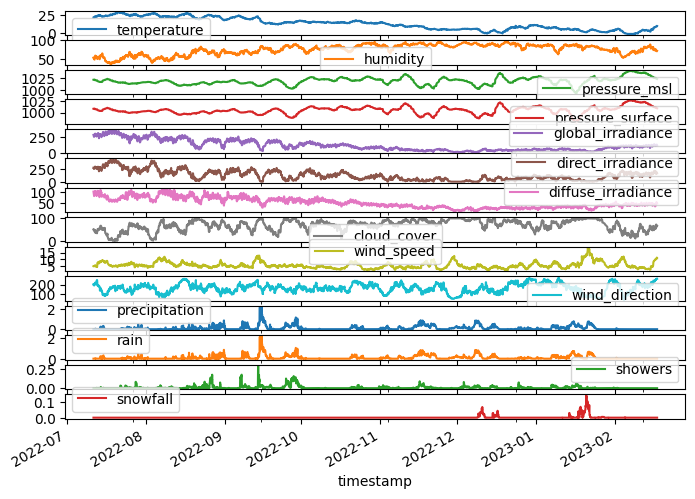

In [67]:
features.plot(subplots=True)

In [68]:
# ### standardize data
#dataset = features
dataset = np.array(features)
# data_mean = dataset[:train_split].mean(axis =0)

# data_std = dataset[:train_split].std(axis = 0)

# dataset = (dataset - data_mean)/data_std



In [69]:
### create mutlivariate data

def mutlivariate_data(dataset , target , start_idx , end_idx , history_size , target_size,
                      step ,  single_step = False):
  data = []
  labels = []
  start_idx = start_idx + history_size
  if end_idx is None:
    end_idx = len(dataset)- target_size
  for i in range(start_idx , end_idx ):
    idxs = range(i-history_size, i, step) ### using step
    data.append(dataset[idxs])
    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data) , np.array(labels)



In [70]:
### generate multivariate data

history = 720
future_target = 72
STEP = 6

x_train_ss , y_train_ss = mutlivariate_data(dataset , dataset[:, 1], 0, train_split, history,
                                            future_target, STEP , single_step = True)

x_val_ss , y_val_ss = mutlivariate_data(dataset , dataset[:,1] , train_split , None , history ,
                                        future_target, STEP, single_step = True)

print(x_train_ss.shape , y_train_ss.shape)

(3513, 120, 14) (3513,)


In [71]:
x_train_ss

array([[[2.13316667e+01, 5.37166667e+01, 1.02180667e+03, ...,
         1.66666667e-03, 0.00000000e+00, 0.00000000e+00],
        [2.17870370e+01, 5.14629630e+01, 1.02207407e+03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.30638889e+01, 5.22916667e+01, 1.02089583e+03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [2.29288462e+01, 4.50000000e+01, 1.02018846e+03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.31357143e+01, 4.38571429e+01, 1.01889286e+03, ...,
         0.00000000e+00, 1.14285714e-02, 0.00000000e+00],
        [2.30093750e+01, 4.53750000e+01, 1.01842969e+03, ...,
         0.00000000e+00, 1.56250000e-03, 0.00000000e+00]],

       [[2.13203390e+01, 5.39152542e+01, 1.02181186e+03, ...,
         1.69491525e-03, 0.00000000e+00, 0.00000000e+00],
        [2.17773585e+01, 5.16037736e+01, 1.02211509e+03, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.31380282e+01, 

In [72]:
## tensorflow dataset

train_ss = tf.data.Dataset.from_tensor_slices((x_train_ss, y_train_ss))
train_ss = train_ss.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_ss = tf.data.Dataset.from_tensor_slices((x_val_ss, y_val_ss))
val_ss = val_ss.cache().shuffle(buffer_size).batch(batch_size).repeat()

print(train_ss)
print(val_ss)



<_RepeatDataset element_spec=(TensorSpec(shape=(None, 120, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<_RepeatDataset element_spec=(TensorSpec(shape=(None, 120, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [73]:
### Modelling using LSTM
from keras.callbacks import EarlyStopping
callbacks = EarlyStopping(
    patience = 10 , 
    restore_best_weights = True , 
    monitor = 'val_loss'
)
single_step_model = tf.keras.models.Sequential()

single_step_model.add(tf.keras.layers.LSTM(16, return_sequences=True,input_shape = x_train_ss.shape[-2:]))
# single_step_model.add(tf.keras.layers.LSTM(32,return_sequences=False))
single_step_model.add(tf.keras.layers.Dense(4, activation="relu"))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mae')
single_step_model.summary()


single_step_model_history = single_step_model.fit(train_ss, epochs = EPOCHS ,
                                                  steps_per_epoch =steps,verbose=1, validation_data = val_ss,
                                                  validation_steps = 50)


/Users/faymajidelhassan/anaconda3/envs/m/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 120, 16)        │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 120, 4)         │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 120, 1)         │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,057 (8.04 KB)

 Trainable params: 2,057 (8.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 78.3438 - val_loss: 72.4366
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 78.9225 - val_loss: 70.4122
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 76.6200 - val_loss: 67.7800
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 72.4553 - val_loss: 63.1069
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 69.1005 - val_loss: 57.3030
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 61.8247 - val_loss: 50.7438
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 54.4570 - val_loss: 40.9903
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 46.0814 - val_loss: 31.7561
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 34.7718 - val_loss: 21.8307
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 25.9728 - val_loss: 11.7982
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 17.5596 - val_loss: 5.8020
Epoch 12/50
200/200 

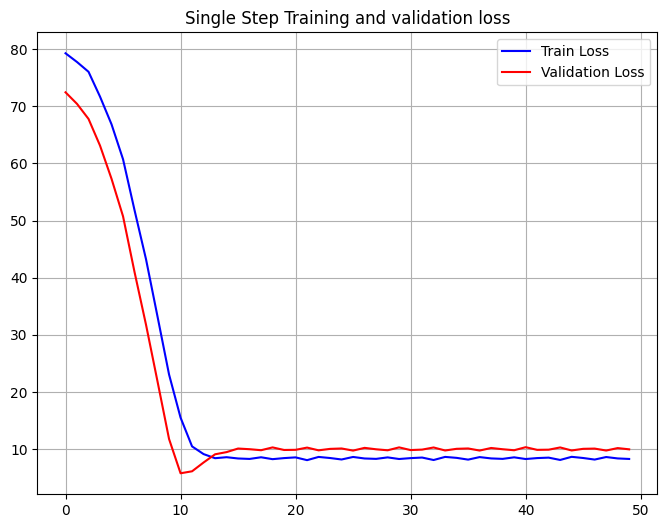

In [74]:
## plot train test loss 

def plot_loss(history , title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))
  plt.figure()
  plt.plot(epochs, loss , 'b' , label = 'Train Loss')
  plt.plot(epochs, val_loss , 'r' , label = 'Validation Loss')
  plt.title(title)
  plt.legend()
  plt.grid()
  plt.show()

plot_loss(single_step_model_history , 'Single Step Training and validation loss')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


ValueError: x and y must have same first dimension, but have shapes (1,) and (120, 1)

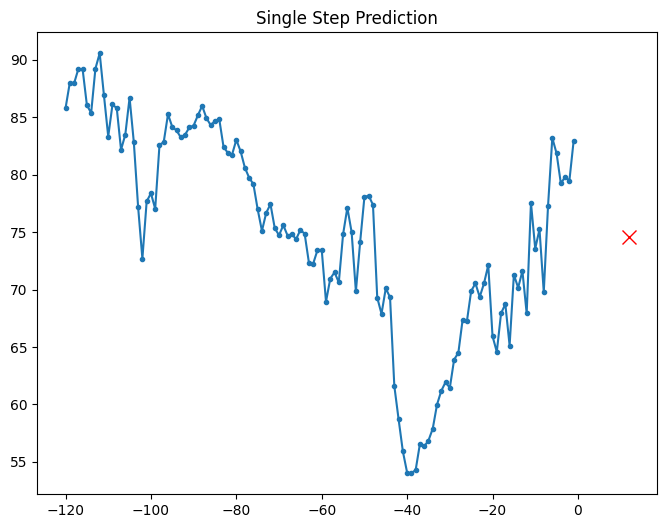

In [75]:
# plot time series and predicted values

for x, y in val_ss.take(5):
  plot = plot_time_series([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()

Multi-variate & multi-step forecasting
-> Generate multiple future values of temperature

In [76]:
future_target = 72 # 72 future values
x_train_multi, y_train_multi = mutlivariate_data(dataset, dataset[:, 1], 0,
                                                 train_split, history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = mutlivariate_data(dataset, dataset[:, 1],
                                             train_split, None, history,
                                             future_target, STEP)

print(x_train_multi.shape)
print(y_train_multi.shape)

(3513, 120, 14)
(3513, 72)


In [77]:
# TF DATASET

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(batch_size).repeat()

2024-05-27 11:42:12.040997: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


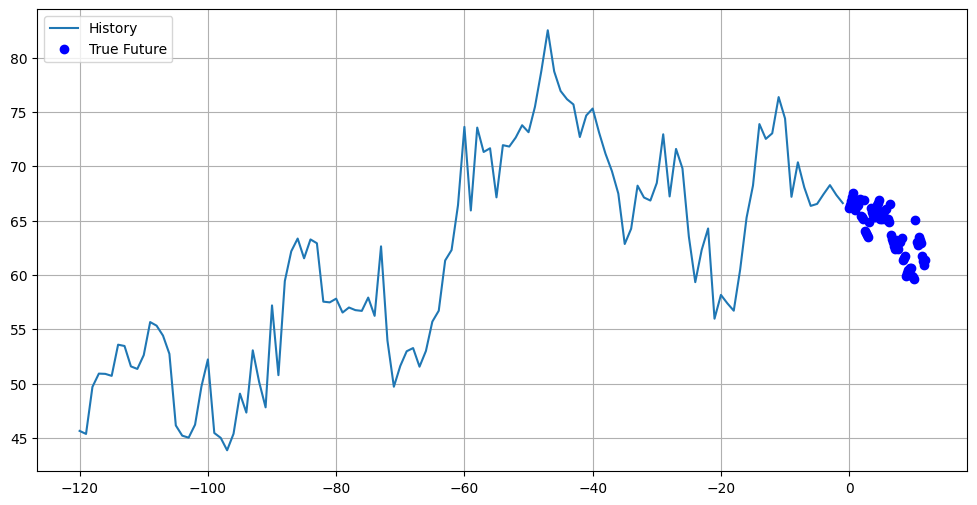

2024-05-27 11:42:12.186635: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [78]:
#plotting function
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)
  plt.grid()
  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()
  


for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

In [106]:
# multi_step_model = tf.keras.models.Sequential()
# multi_step_model.add(tf.keras.layers.LSTM(16,
#                                           return_sequences=True,
#                                           input_shape=x_train_multi.shape[-2:]))
# multi_step_model.add(tf.keras.layers.LSTM(32,return_sequences=False, activation='relu'))
# multi_step_model.add(tf.keras.layers.Dense(4))
# multi_step_model.add(tf.keras.layers.Dense(72)) # for 72 outputs

# multi_step_model.compile(optimizer=tf.keras.optimizers.SGD(clipvalue=1.0,weight_decay=1e-6), loss='mae')
# multi_step_model.summary()
# multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
#                                           steps_per_epoch=steps,
#                                           validation_data=val_data_multi,
#                                           validation_steps=50,callbacks = [callbacks])



# Define the model
multi_step_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(16, return_sequences=False, input_shape=x_train_multi.shape[-2:]),
    # tf.keras.layers.Dropout(0.2),  # Dropout layer for regularization
    # tf.keras.layers.LSTM(64, return_sequences=True, activation='relu'),
    # tf.keras.layers.Dropout(0.2),  # Dropout layer for regularization
    # tf.keras.layers.LSTM(2, return_sequences=False, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),  # Additional dense layer
    tf.keras.layers.Dense(72)  # 72 outputs for future predictions
])

# Compile the model
multi_step_model.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=1.0,weight_decay=1e-6), loss='mae')

# Print the model summary
multi_step_model.summary()

# Define callbacks for early stopping and learning rate scheduling
# 

# Fit the model
enhanced_history = multi_step_model.fit(train_data_multi, 
                                      epochs=EPOCHS,
                                      steps_per_epoch=steps,
                                      validation_data=val_data_multi,
                                      validation_steps=50
                                    )

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                  │ (None, 16)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 72)             │           648 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,768 (10.81 KB)

 Trainable params: 2,768 (10.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 78.1213 - val_loss: 69.6703
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 77.3834 - val_loss: 62.8692
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 69.1022 - val_loss: 51.7583
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 55.7049 - val_loss: 36.8161
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 41.8616 - val_loss: 19.1506
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 22.9966 - val_loss: 7.1779
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 11.1439 - val_loss: 9.2836
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 8.8205 - val_loss: 12.3178
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 9.0938 - val_loss: 11.5736
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 8.6130 - val_loss: 12.2605
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 8.3014 - val_loss: 13.0698
Epoch 12/50
200/200 ━━━━━

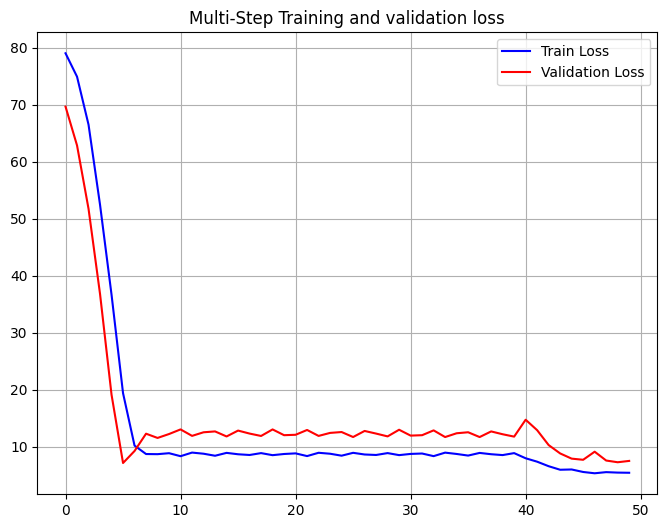

In [107]:
plot_loss(enhanced_history, 'Multi-Step Training and validation loss')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


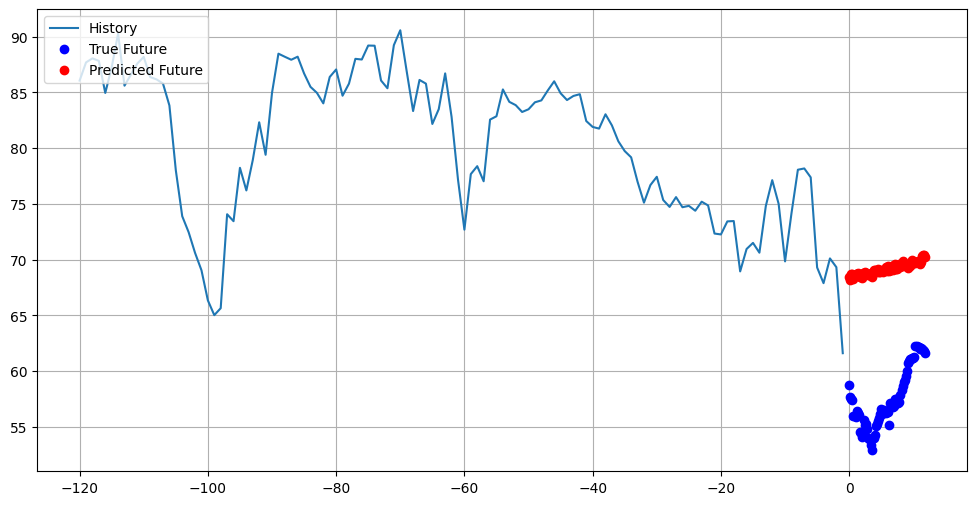

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


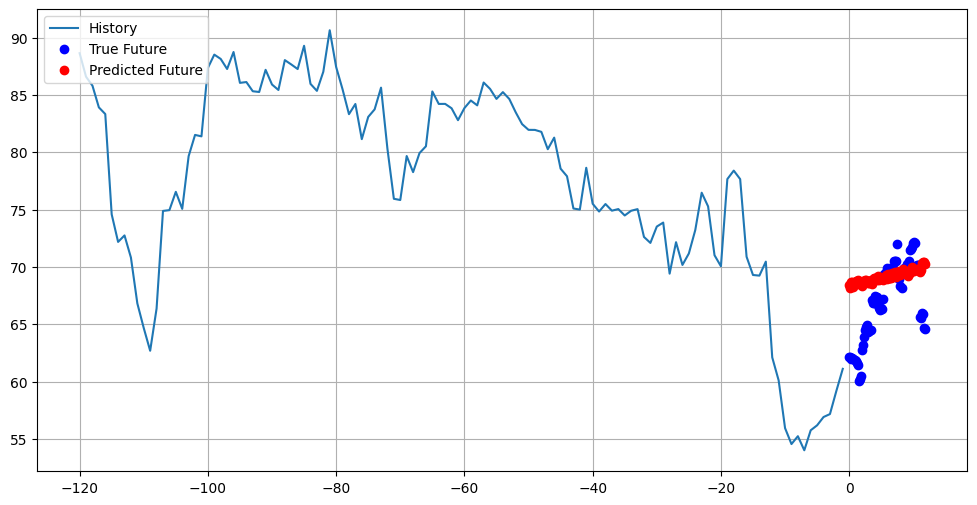

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


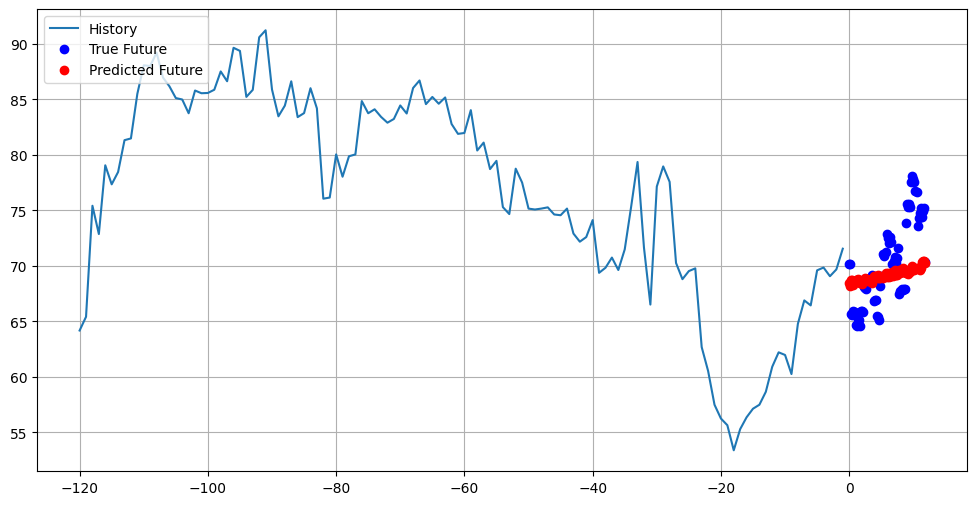

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


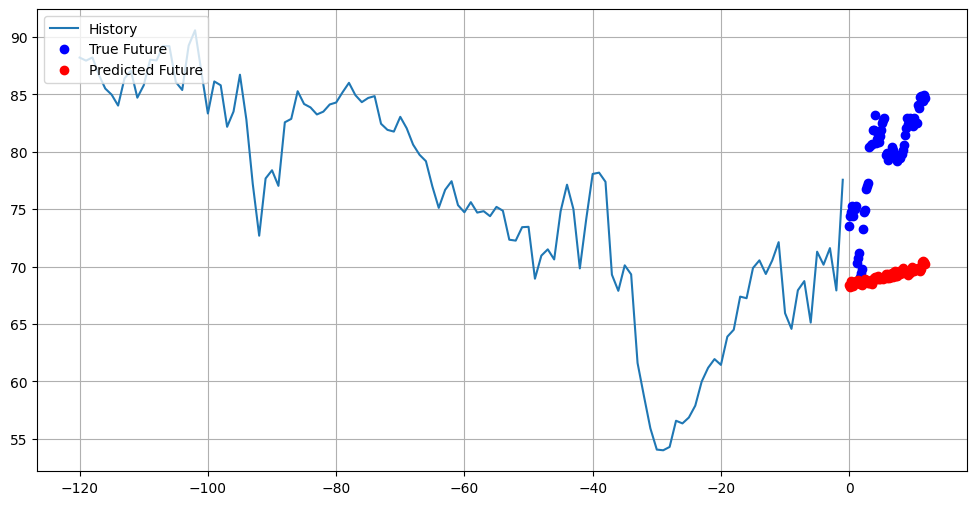

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


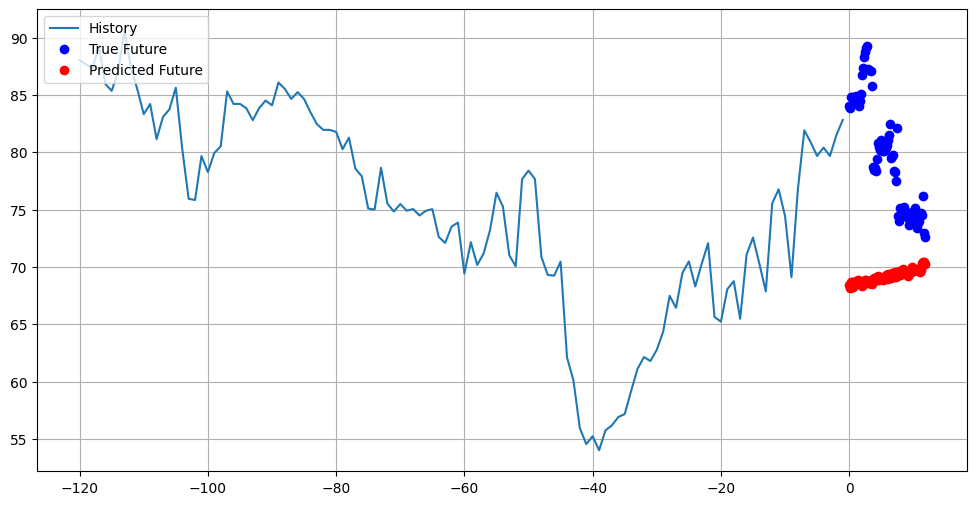

2024-05-27 12:08:07.930367: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [108]:
for x, y in val_data_multi.take(5):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])